In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras as krs

In [5]:
from tensorflow.keras.datasets import imdb

In [6]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10_000)


In [9]:
from joblib import dump,load
with open(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\Keras\imdb\train_data.pkl","wb") as f:
    dump(train_data,f)
with open(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\Keras\imdb\train_labels.pkl","wb") as f:
    dump(train_labels,f)
with open(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\Keras\imdb\test_data.pkl","wb") as f:
    dump(test_data,f)
with open(r"C:\Users\user\OneDrive\Documents\D_I_G\ML\Keras\imdb\test_labels.pkl","wb") as f:
    dump(test_labels,f)

In [19]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(25000,) (25000,) (25000,) (25000,)


In [31]:
len(train_data[0])

218

In [34]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

decode map in reverse (tactile demonstration)

In [37]:
word_index=imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])
decoded_review[:len(decoded_review)//10]

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they "

one hot encoded vectors of len(train_data) rows (observations) and len(num_words)

In [38]:
def vectorize_sequences(sequences,num_words=10_000):
  results = np.zeros((len(sequences),num_words))
  for word,sequence in enumerate(sequences):
    results[word,sequence]=1
  return results

In [39]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
print(len(x_train[0]),len(train_data[0]))

10000 218


In [88]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

implement neural network

In [44]:
from tensorflow.keras import layers

In [113]:
model = krs.Sequential([layers.Dense(16,activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(1,activation='sigmoid')])

In [114]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

VALIDATION

In [115]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

train

In [116]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6830 - loss: 0.6206 - val_accuracy: 0.8643 - val_loss: 0.4170
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8909 - loss: 0.3523 - val_accuracy: 0.8864 - val_loss: 0.3083
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9193 - loss: 0.2443 - val_accuracy: 0.8751 - val_loss: 0.3068
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9443 - loss: 0.1797 - val_accuracy: 0.8844 - val_loss: 0.2857
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9562 - loss: 0.1395 - val_accuracy: 0.8855 - val_loss: 0.2901
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9633 - loss: 0.1201 - val_accuracy: 0.8835 - val_loss: 0.3022
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9776 - loss: 0.0900 - val_accuracy: 0.8812 - val_loss: 0.3264
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9803 - loss: 0.0768 - val_accuracy: 0.8811 - v

In [117]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

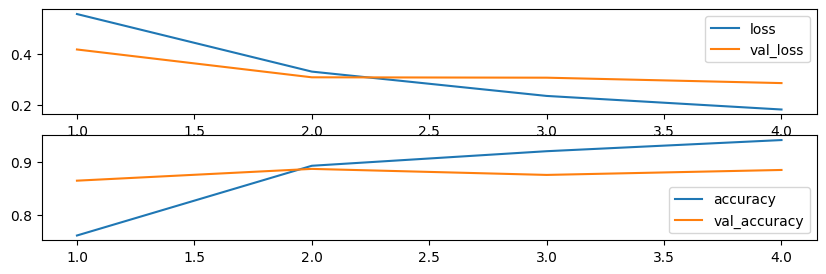

In [120]:
epoch_slice_point = 4  # to zero in on the front epochs
epochs_ = [i for i in range(1,len(history_dict['loss'][:epoch_slice_point])+1)]
fig=plt.figure(figsize=(10,3))
plt.subplot(2,1,1)
sns.lineplot(x=epochs_,y=history_dict['loss'][:epoch_slice_point],label='loss')
sns.lineplot(x=epochs_,y=history_dict['val_loss'][:epoch_slice_point],label='val_loss')
plt.legend()
plt.subplot(2,1,2)
sns.lineplot(x=epochs_,y=history_dict['accuracy'][:epoch_slice_point],label='accuracy')
sns.lineplot(x=epochs_,y=history_dict['val_accuracy'][:epoch_slice_point],label='val_accuracy')
plt.legend()
plt.show()

In [121]:
model = krs.Sequential([layers.Dense(16,activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=2
          ,batch_size=512)
results = model.evaluate(x_test,y_test)
results

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7126 - loss: 0.5863
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8946 - loss: 0.2982
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8812 - loss: 0.2952


[0.29621678590774536, 0.8821600079536438]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [90]:
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [94]:
predictions[::1500]

array([[1.78310931e-01],
       [8.43782425e-01],
       [1.72432302e-03],
       [9.02619302e-01],
       [9.43795621e-01],
       [2.66990196e-02],
       [9.68400985e-02],
       [4.24909331e-02],
       [8.51190765e-04],
       [1.33244377e-02],
       [1.16960876e-01],
       [6.35167003e-01],
       [3.36694978e-02],
       [9.65406239e-01],
       [9.97239411e-01],
       [9.98258591e-01],
       [1.74358822e-02]], dtype=float32)